# The Venture Capital Life Cycle

1. Fundraise to get committed capital. Money is not transfered but legaly committed to be pulled down at any point in the fund life.

2. Begin drawing down on committed capital to make investments in companies.

3. Grow and manage portfolio companies.

4. Begin exiting companies through IPO, secondary sales, write downs, mergers, etc. and distribute the funds to the limited partners. Based on established term sheet, carry will be collected if investment returns exceed a certain threshold.

5. Close down the fund after all companies have been exited. 

# Management Fees

Management fees are assessed on **committed capital** not on drawdown capital. This is important because it means that even while some money may not have been pulled down for use within the fund, the VC will be collecting annual fees on it to pay for operating expenses. These fees can generally range from 1-2% a year. Let's look at an example of management fees for a fund which has $500 million in committed capital, which we believe will be in operation for 8 years, and charges a 1% management fee.

In [1]:
import pandas as pd

#Start with a look at the committed capital in each year, it is constant
mgmt_fees = pd.DataFrame(500, index= ['Committed Capital'], columns=list(range(1,9)))
print(mgmt_fees)

                     1    2    3    4    5    6    7    8
Committed Capital  500  500  500  500  500  500  500  500


In [2]:
#Management fees will be 1% a year
mgmt_fees.loc['Management Fee'] = mgmt_fees.loc['Committed Capital'] * .01
print(mgmt_fees)

                       1      2      3      4      5      6      7      8
Committed Capital  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0
Management Fee       5.0    5.0    5.0    5.0    5.0    5.0    5.0    5.0


# Fund Capital Calls and Distributions

Let's return to our committed capital that we have. The fund will not call down all funds at once, but rather over time as investments are found. Let's first simulate capital calls of \\$200 million in the first year, \\$150 million in the next year, and another \\$150 million in the year after.

In [3]:
#Start with a look at the committed capital in each year, it is constant
distributions = pd.DataFrame(500, index= ['Committed Capital'], columns=list(range(1,9)))

#The capital calls in each year are $200, $150, $150, and $0 in the rest because all has been called down
distributions.loc['Capital Call'] = [200, 150, 150, 0, 0, 0, 0, 0]
print(distributions)

                     1    2    3    4    5    6    7    8
Committed Capital  500  500  500  500  500  500  500  500
Capital Call       200  150  150    0    0    0    0    0


In [4]:
#The cumsum function will get the cummulative sum of a column or row
print(distributions.loc['Capital Call'].cumsum())

1    200
2    350
3    500
4    500
5    500
6    500
7    500
8    500
Name: Capital Call, dtype: int64


In [5]:
#Add this row to the table
distributions.loc['Total Called Capital'] = distributions.loc['Capital Call'].cumsum()
print(distributions)

                        1    2    3    4    5    6    7    8
Committed Capital     500  500  500  500  500  500  500  500
Capital Call          200  150  150    0    0    0    0    0
Total Called Capital  200  350  500  500  500  500  500  500


Distributions begin as the companies are exited. These distributions are split between general and limited partners based on the agreed upon terms. Let's say the following numbers below represent the distributions.

In [6]:
distributions.loc['Distributions'] = [0, 0, 0, 350, 200, 200, 400, 200]
distributions.loc['Total Distributions'] = distributions.loc['Distributions'].cumsum()
print(distributions)

                        1    2    3    4    5    6     7     8
Committed Capital     500  500  500  500  500  500   500   500
Capital Call          200  150  150    0    0    0     0     0
Total Called Capital  200  350  500  500  500  500   500   500
Distributions           0    0    0  350  200  200   400   200
Total Distributions     0    0    0  350  550  750  1150  1350


# Carry

Where a fund can make huge amounts of money for themselves is the carry. The carry is the fees that can be collected on profits. For example, carry might be 20% of the profits. The carry would not be charged on the committed capital returned (only on profits made on top of returning the capital), and might or might not be after management fees are exceeded as well. Generally speaking, carry tends to be collected at the end of the fund life as opposed to on the basis of as exits are completed. There are times, though, that terms are for carry on a deal by deal basis.

## Carry without Management Fees Considered

Let's begin with an example where the terms of carry is simply that all the money is returned before a carry of 20% can be collected. Then the formula will be:

$ C = MAX(D-CC, 0) * P $

where 

$ C = \text{Carry} $

$ D = \text{Distributions} $

$ CC = \text{Committed Capital} $

$ P = \text{Percent for Carry} $


### Model 3 Scenarios

Find the carry for a fund which has 20% as the percent collected in the following scenarios:

1. Distributions are only 350 million resulting in a loss.
2. Distributions are exactly 500 million.
3. Distributions are 800 million.

In [7]:
C1 = max(350-500, 0) * .2
C2 = max(500-500, 0) * .2
C3 = max(800-500, 0) * .2

print(C1)
print(C2)
print(C3)

0.0
0.0
60.0


In [8]:
#Calculate the total amount of management fees collected throughout the time period
MF = mgmt_fees.loc['Management Fee'].sum()
print(MF)

40.0


In [9]:
#The total fees collected will be the management fee + carry
F1 = C1 + MF
F2 = C2 + MF
F3 = C3 + MF

print(F1)
print(F2)
print(F3)

40.0
40.0
100.0


## Profit for Limited Partners

The profit for the limited partners will be equal to the distributions less the initial investment, management fees, and any carry.

$P = D - I - M - C $

where 

$P = \text{Profit}$

$D = \text{Distributions}$

$I = \text{Initial Investment}$

$M = \text{Management Fee}$

$C = \text{Carry}$


In [10]:
P1 = 350-F1 - 500
P2 = 500-F2 - 500
P3 = 800-F1 - 500

print(P1)
print(P2)
print(P3)

-190.0
-40.0
260.0


## IRR for Limited Partners

The IRR, or interal rate of return, is the return for which the present value of all cash flows equals 0. What this essentially tells you is, given the timing of cash flows, what rate of return is implied. Thus, it is the value for r that solves this equation:

$ 0 = \sum_{t=0}^{T} \frac{CF_{t}}{(1+IRR)^t}$

where 

$ t = \text{Year} $

$ T = \text{Total Number of Years} $

$CF_{t} = \text{Cash flow at time t} $


This equation is derived from the fact that the NPV (net present value) is the found through the equation below, but IRR is the rate that makes it so the net present value is 0:

$ NPV = \sum_{t=0}^{T} \frac{CF_{t}}{(1+r)^t}$


Let's begin with a simple example. The cashflows in year 0 through 4, where negative cashflow means you as the investor pay, and a positive means you receive money, are: -\\$100, -\\$100, \\$100, \\$100, \\$100. First, visualize the net present value given different discount rates.

## The difference between IRR and ROI

ROI is simply the total earnings divided by the investment which was made an measures overall how profitable a certain investment was. The difference between this and IRR is that IRR calculates a rate that takes into account both timing of cash flows and also annualizes the rate. IRR is used to capture the idea that having cashflows earlier on has a benefit in that you are able to deploy that capital for other purposes, in the case of venture capital firms it can mean that you are able to pay distributions to limited partners who then can invest in another fund earlier leading to a higher ROI as compared to getting the cashflows later.

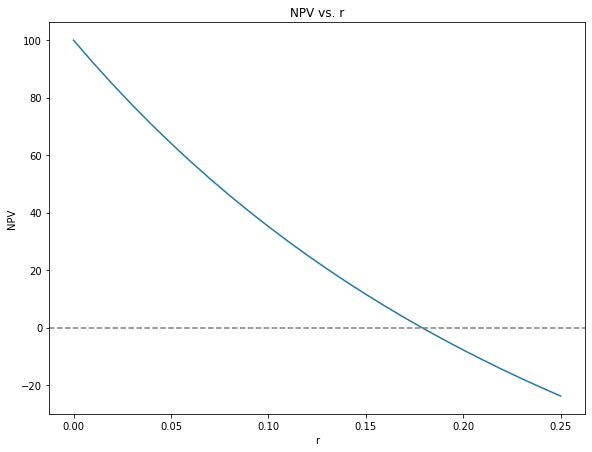

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 9.6, 7.2

x = np.arange(0,.26,.01)
NPV = []
for r in x:
    value = 0
    value += -100
    value += -100 / (1+r)
    value += 100 / (1+r)**2
    value += 100 / (1+r)**3
    value += 100 / (1+r)**4
    NPV.append(value)

plt.plot(x,NPV)
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel("r")
plt.ylabel("NPV")
plt.title("NPV vs. r")
plt.show()

Let's formalize this into a function given yearly cash flows.

In [12]:
#Define the discount rate
r = .05

#Create cashflows
cash_flows = np.array([-100, -100, 100, 100, 100])
print(cash_flows)

#Represent the years
t = np.array(range(len(cash_flows)))
print()
print(t)

#Find the discount factors
df = (1 + r) ** t
print()
print(df)

[-100 -100  100  100  100]

[0 1 2 3 4]

[1.         1.05       1.1025     1.157625   1.21550625]


In [13]:
#With these we can discount the cashflows then sum
print(cash_flows / df)
print()
print((cash_flows / df).sum())

[-100.          -95.23809524   90.70294785   86.38375985   82.27024748]

64.11885994004552


In [14]:
#Create a function
def find_NPV(cash_flows, t, r):
    df = (1 + r) ** t
    return (cash_flows / df).sum()
t = np.array(range(len(cash_flows)))
print(find_NPV(cash_flows, t, .05))

64.11885994004552


If we wanted to find the point where NPV is equal to 0, we could find the distance to 0 squared, which would provide us the minimum value when NPV is equal to 0. Mathematically, we are finding the value of:

$ (NPV-0)^2 $

which is the same as:

$ NPV^2 $

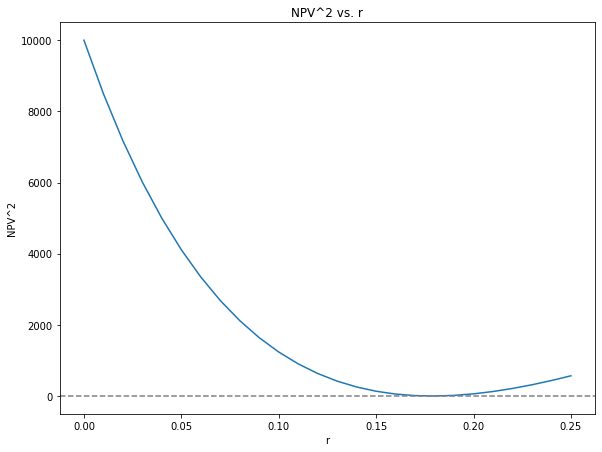

In [15]:
def sq_distance(r, t, cash_flows):
    NPV = find_NPV(cash_flows, t, r)
    return NPV ** 2


x = np.arange(0,.26,.01)
NPV_dist = []
for r in x:
    NPV_dist.append(sq_distance(r, t, cash_flows))

plt.plot(x,NPV_dist)
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel("r")
plt.ylabel("NPV^2")
plt.title("NPV^2 vs. r")
plt.show()

If we minimize this function, we will get back the IRR which is the rate r that makes the NPV 0! For more information on the minimize function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [16]:
from scipy.optimize import minimize

IRR = minimize(sq_distance, .05, args=(t, cash_flows), method="Nelder-Mead")['x'][0]
print(IRR)

print()
print(find_NPV(cash_flows, t, IRR))

0.17871093750000047

0.005048637399866607


## Limited Partner Profit Function

Let's work through an example of keeping track of fees and its impact on distributions. It is important to understand that companies can do all sorts of different things in this respect, this is just one example! First recall what we originally had.

In [17]:
print(distributions)
print()
print()
print(mgmt_fees)

                        1    2    3    4    5    6     7     8
Committed Capital     500  500  500  500  500  500   500   500
Capital Call          200  150  150    0    0    0     0     0
Total Called Capital  200  350  500  500  500  500   500   500
Distributions           0    0    0  350  200  200   400   200
Total Distributions     0    0    0  350  550  750  1150  1350


                       1      2      3      4      5      6      7      8
Committed Capital  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0
Management Fee       5.0    5.0    5.0    5.0    5.0    5.0    5.0    5.0


Now, take the running total of distributions before any fees are applied and link add in a running total of the management fees.

In [18]:
lp_profits = pd.concat([distributions.loc['Total Distributions'], mgmt_fees.loc['Management Fee'].cumsum()], axis=1).transpose()
print(lp_profits)

                       1     2     3      4      5      6       7       8
Total Distributions  0.0   0.0   0.0  350.0  550.0  750.0  1150.0  1350.0
Management Fee       5.0  10.0  15.0   20.0   25.0   30.0    35.0    40.0


Now, get the net position based on the difference.

In [19]:
lp_profits.loc['Net Mgmt Fees'] = lp_profits.loc['Total Distributions'] - lp_profits.loc['Management Fee']
print(lp_profits)

                       1     2     3      4      5      6       7       8
Total Distributions  0.0   0.0   0.0  350.0  550.0  750.0  1150.0  1350.0
Management Fee       5.0  10.0  15.0   20.0   25.0   30.0    35.0    40.0
Net Mgmt Fees       -5.0 -10.0 -15.0  330.0  525.0  720.0  1115.0  1310.0


For the performance fee, we will work the hypothetical assumption that agreement states performance fees of 20% may be charged on any performance net of management fees over the committed capital. Using this assumption, we add in the performance fee accrued.

In [20]:
lp_profits.loc['Performance Fee'] = lp_profits.loc['Net Mgmt Fees'].apply(lambda x: max(x-500,0) * .2)
print(lp_profits)

                       1     2     3      4      5      6       7       8
Total Distributions  0.0   0.0   0.0  350.0  550.0  750.0  1150.0  1350.0
Management Fee       5.0  10.0  15.0   20.0   25.0   30.0    35.0    40.0
Net Mgmt Fees       -5.0 -10.0 -15.0  330.0  525.0  720.0  1115.0  1310.0
Performance Fee      0.0   0.0   0.0    0.0    5.0   44.0   123.0   162.0


Get the net performance fee total distribution.

In [21]:
lp_profits.loc['Net Perf Fee'] = lp_profits.loc['Net Mgmt Fees'] - lp_profits.loc['Performance Fee']
print(lp_profits)

                       1     2     3      4      5      6       7       8
Total Distributions  0.0   0.0   0.0  350.0  550.0  750.0  1150.0  1350.0
Management Fee       5.0  10.0  15.0   20.0   25.0   30.0    35.0    40.0
Net Mgmt Fees       -5.0 -10.0 -15.0  330.0  525.0  720.0  1115.0  1310.0
Performance Fee      0.0   0.0   0.0    0.0    5.0   44.0   123.0   162.0
Net Perf Fee        -5.0 -10.0 -15.0  330.0  520.0  676.0   992.0  1148.0


The net performance fee when it is negative is just a paper loss because we already have the money from the investors drawn down to pay out these. Because of this we may want a new row which describes the total distributions net fees and has values of 0 when there are negative values.

In [22]:
lp_profits.loc['Total Distributions Net Fees'] = lp_profits.loc['Net Perf Fee'].apply(lambda x: max(x, 0))
print(lp_profits)

                                1     2     3      4      5      6       7  \
Total Distributions           0.0   0.0   0.0  350.0  550.0  750.0  1150.0   
Management Fee                5.0  10.0  15.0   20.0   25.0   30.0    35.0   
Net Mgmt Fees                -5.0 -10.0 -15.0  330.0  525.0  720.0  1115.0   
Performance Fee               0.0   0.0   0.0    0.0    5.0   44.0   123.0   
Net Perf Fee                 -5.0 -10.0 -15.0  330.0  520.0  676.0   992.0   
Total Distributions Net Fees  0.0   0.0   0.0  330.0  520.0  676.0   992.0   

                                   8  
Total Distributions           1350.0  
Management Fee                  40.0  
Net Mgmt Fees                 1310.0  
Performance Fee                162.0  
Net Perf Fee                  1148.0  
Total Distributions Net Fees  1148.0  


Finally, to find the distributions necessary each period, we can subtract the prior period value (by using shift). For the case of year 1, we need to make sure we fill null values with 0 in the shifted series (because distributions are 0 before beginning).

In [23]:
ending = lp_profits.loc['Total Distributions Net Fees']
starting = lp_profits.loc['Total Distributions Net Fees'].shift(1).fillna(0)
lp_profits.loc['Distribution'] = ending - starting
print(lp_profits)

                                1     2     3      4      5      6       7  \
Total Distributions           0.0   0.0   0.0  350.0  550.0  750.0  1150.0   
Management Fee                5.0  10.0  15.0   20.0   25.0   30.0    35.0   
Net Mgmt Fees                -5.0 -10.0 -15.0  330.0  525.0  720.0  1115.0   
Performance Fee               0.0   0.0   0.0    0.0    5.0   44.0   123.0   
Net Perf Fee                 -5.0 -10.0 -15.0  330.0  520.0  676.0   992.0   
Total Distributions Net Fees  0.0   0.0   0.0  330.0  520.0  676.0   992.0   
Distribution                  0.0   0.0   0.0  330.0  190.0  156.0   316.0   

                                   8  
Total Distributions           1350.0  
Management Fee                  40.0  
Net Mgmt Fees                 1310.0  
Performance Fee                162.0  
Net Perf Fee                  1148.0  
Total Distributions Net Fees  1148.0  
Distribution                   156.0  


The limited partner cash flows are found by subtracting these distributions from the capital that was called over the years prior.

In [24]:
lp_cash_flows = lp_profits.loc["Distribution"] - distributions.loc["Capital Call"]
print(lp_cash_flows)

1   -200.0
2   -150.0
3   -150.0
4    330.0
5    190.0
6    156.0
7    316.0
8    156.0
dtype: float64


Find the IRR from these cashflows.

In [25]:
IRR = minimize(sq_distance, .05, args=(lp_cash_flows.index, lp_cash_flows), method="Nelder-Mead")['x'][0]
print(IRR)

0.24787109375000071


We can compare this to the IRR without fees.

In [26]:
pre_fees_cash_flows = distributions.loc["Distributions"] - distributions.loc["Capital Call"]
IRR = minimize(sq_distance, .05, args=(pre_fees_cash_flows.index, pre_fees_cash_flows), method="Nelder-Mead")['x'][0]
print(IRR)

0.29453125000000085


## The J Curve

Often with this type of investing, there is a "J Curve" to profits because in the beginning money is only withdrawn leading to very negative overall cash flow which then eventually turns positive in later years. It is tough to evaluate performance in the beginning because these funds start very much so in the red, but it is well known that this is the trajectory. Let's plot the J Curve for these cashflows by getting total distributions then plotting that.

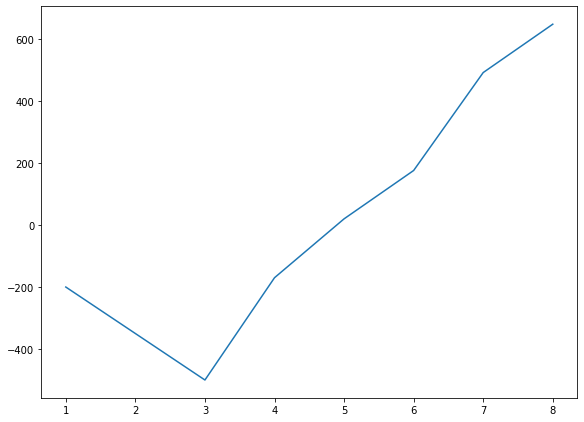

In [27]:
total_distributions = lp_cash_flows.cumsum()
total_distributions.plot(kind='line')
plt.show()

## Expanding Period IRR

Let's look at what the IRR is at each point in time where we have at least one positive value.

In [28]:
rolling_irr = distributions.loc['Distributions'] - distributions.loc['Capital Call']
rolling_irr = rolling_irr.expanding().apply(lambda x: minimize(sq_distance, .05, args=(x.index, x), method="Nelder-Mead")['x'][0] if max(x) > 0 else np.NaN)
print(rolling_irr)

1         NaN
2         NaN
3         NaN
4   -0.160464
5    0.039297
6    0.150059
7    0.263262
8    0.294531
dtype: float64


## Benchmark IRR Performance Fee

Another way to view define the performance fee is one where the fund will only get a performance fee on an IRR above a given benchmark. This ensures that the general partners have made at least a solid return before they have to pay for the performance fee. Let's begin with a basic example and see how this might work. Let's say the following are the capital calls (negative values) in the first three years, then the next two years are the total profits/distributions that need to be split.

In [29]:
cash_flows = pd.Series([-400, -300, -300, 800, 1600])
print(cash_flows)

0    -400
1    -300
2    -300
3     800
4    1600
dtype: int64


Before any performance fees, this IRR looks pretty good!

In [30]:
IRR = minimize(sq_distance, .05, args=(cash_flows.index, cash_flows), method="Nelder-Mead")['x'][0]
print(IRR)

0.36175781250000116


Now, we also know that up until year 4, even if the performance fee has no benchmark to beat, it won't be collected because the total earned is still less than the capital called down. In the fifth year, we can get that performacne fee, so let's make a new version of net cash flows and update for the 20% of (2400-1000) that the fund gets.

In [31]:
cash_flows_net = cash_flows.copy()
cash_flows_net.loc[4] -= 1400 * .2
print(cash_flows_net)

0    -400.0
1    -300.0
2    -300.0
3     800.0
4    1320.0
dtype: float64


What about the IRR after this performance fee?

In [32]:
IRR = minimize(sq_distance, .05, args=(cash_flows.index, cash_flows_net), method="Nelder-Mead")['x'][0]
print(IRR)

0.3101464843750009


## Finding the NPV 

The first thing we are going to need to do for figuring out if a performance fee would be collected given a hurdle rate is to see what the NPV is. Let's say that our hurdle rate IRR is 10%. In this case, we know that the NPV using r=10% must be positive to collected a performance fee.

In [33]:
NPV = (cash_flows / (1.1) ** cash_flows.index).sum()
print(NPV)

773.2122122805815


Becuase it is positive, we know that we will collect a fee! Now, if that fee is collected in the last year, we can't use the present value for figuring out what is left over to be collected on, we must use the future value. The future value (at year 4) of the NPV is....

In [34]:
FV = NPV * 1.1 ** 4
print(FV)

1132.0599999999997


So this means that $1132.05 in terms of future value, was earned over the expected benchmark return. We can create a series of data that takes out this future value to confirm that the cashflows less this future value lead to an IRR of 10%.

In [35]:
cash_flows_bench = cash_flows.copy()
cash_flows_bench.loc[4] -= FV
print(cash_flows_bench)

0   -400.00
1   -300.00
2   -300.00
3    800.00
4    467.94
dtype: float64


In [36]:
IRR = minimize(sq_distance, .05, args=(cash_flows_bench.index, cash_flows_bench), method="Nelder-Mead")['x'][0]
print(IRR)

0.10000000000000017


So the net earnings are going to be the cashflows that get the investor to a 10% IRR followed plus 80% of the residual profits.

In [37]:
cash_flows_net = cash_flows_bench.copy()
cash_flows_net.loc[4] += FV * .8
print(cash_flows_net)

0    -400.000
1    -300.000
2    -300.000
3     800.000
4    1373.588
dtype: float64


In [38]:
IRR = minimize(sq_distance, .05, args=(cash_flows_net.index, cash_flows_net), method="Nelder-Mead")['x'][0]
print(IRR)

0.3204736328125011


## Catch Up

With a hurdle rate, there are sometimes provisions that the fund gets to catch up once the hurdle rate has been passed. What this means is that there are three areas for the returns:

1. While the returns are below the benchmark returns, all profits are given to the limited partners.
2. After the benchmark return has been reached, all profits are given to the general partners until they have "caught up" to what their proportional performance fee would have been.
3. Any further profits are split based on the performance fee.

The catch up will take the following form assuming that the distributions are greater than step 1 plus the catch up:

$ C = \frac{D_{1} * P}{1-P}$

where

$ C = \text{Catch-up Value}$

$ D_{1} = \text{Distribution from step 1}$

$ P = \text{Performance Fee}$



In the case that the total distributions are possibly less than the catch up we can modify it to say that it is the minimum of this value or whatever is left over after the hurdle rate.

$ C = min(\frac{D_{1} * P}{1-P}, D_{T} - D_{1})$

where we add in

$ D_{T} = \text{Total distributions}$


Let's work through the example again to show how this might differ.

Start with the benchmark returns once again.

In [39]:
print("Total Cash Flows:")
print(cash_flows)
print()
NPV = (cash_flows / (1.1) ** cash_flows.index).sum()
FV = NPV * 1.1 ** 4

cash_flows_bench = cash_flows.copy()
cash_flows_bench.loc[4] -= FV
print("Cash Flows Allocated for Benchmark Return:")
print(cash_flows_bench)
print()

cash_flow_residual = cash_flows - cash_flows_bench
print("Residual Cash Flows:")
print(cash_flow_residual)

Total Cash Flows:
0    -400
1    -300
2    -300
3     800
4    1600
dtype: int64

Cash Flows Allocated for Benchmark Return:
0   -400.00
1   -300.00
2   -300.00
3    800.00
4    467.94
dtype: float64

Residual Cash Flows:
0       0.00
1       0.00
2       0.00
3       0.00
4    1132.06
dtype: float64


Now, let's see what the catch up amount needs to be.

In [40]:
d1 = cash_flows_bench.sum()
print("Step 1 Distributions:")
print(d1)
print()

c = (d1 * .2) / .8
print("Catch up:")
print(c)
print()

cash_flow_residual2 = cash_flow_residual.copy()
cash_flow_residual2.loc[4] -= c
print("Residual Cashflows After Catch Up:")
print(cash_flow_residual2)

Step 1 Distributions:
267.9400000000003

Catch up:
66.98500000000007

Residual Cashflows After Catch Up:
0       0.000
1       0.000
2       0.000
3       0.000
4    1065.075
dtype: float64


For the final step, the residual cash flows are split between the two investors based on the 20% performance fee. So we can construct the cash flows from this for both parties.

In [41]:
cash_flows_LP = cash_flows_bench + cash_flow_residual2 * .8
cash_flows_GP = cash_flow_residual2 * .2
cash_flows_GP.loc[4] += c

print("Limited Partners Cashflows:")
print(cash_flows_LP)
print()

print("General Partners Cashflows:")
print(cash_flows_GP)
print()

Limited Partners Cashflows:
0    -400.0
1    -300.0
2    -300.0
3     800.0
4    1320.0
dtype: float64

General Partners Cashflows:
0      0.0
1      0.0
2      0.0
3      0.0
4    280.0
dtype: float64



And maybe we want to be checking to make sure that the cashflows are split 20%/80% at this point. In that case, the following checks will prove that.

In [42]:
print(cash_flows_LP.sum())
print(cash_flows_GP.sum())
print(cash_flows_GP.sum() / (cash_flows_LP.sum() + cash_flows_GP.sum()))

1120.0
280.0
0.2


## Comparing Performance Fee Structures

In the following part of the lesson we will construct a function that can handle all types of performance fees for us and find the IRR for the limited partner. We will work through one piece at a time to come up with the final function.

Start with a simple performance fee that we will assume is only taken out at the end of the fund life. For this, we just need to find the net cashflows, and if they are positive, subtract out the performance fee for the fund. We will set the hurdle rate to be None by default and catch_up to false.

In [43]:
def find_net_IRR(cash_flows, performance_fee, hurdle_rate=None, catch_up=False):
    #Copy over the cash flows
    cash_flows_net = cash_flows.copy()
    
    if hurdle_rate is None:
        #Get the total distributions only if positive for the performance fee
        gp_share = max(0, cash_flows_net.sum()) * performance_fee
        
        #Subtract out the general partner share from the cash flows
        cash_flows_net.iloc[-1] -= gp_share
    else:
        assert False, "Not implemented yet"
    
    #Compute the IRR
    IRR = minimize(sq_distance, -.2, args=(cash_flows_net.index, cash_flows_net), method="Nelder-Mead")['x'][0]
    
    return IRR

We also will define scenarios where we take the positive cash flows and multiply them by a few different multipliers to simulate possible scenarios.

In [44]:
#Find a range of cash flows
x_cf = [pd.concat([cash_flows[:3], cash_flows[3:] * i/24]) for i in range(2, 49)]

#Print out the first two as an example
print(x_cf[:2])

[0   -400.000000
1   -300.000000
2   -300.000000
3     66.666667
4    133.333333
dtype: float64, 0   -400.0
1   -300.0
2   -300.0
3    100.0
4    200.0
dtype: float64]


We also want to see what the IRR before performance fee will be in these cases. I set the best guess to -20% because it ensures the optimization converges correctly.

In [45]:
#Find the IRR for pre performance fee
IRR_pre = [minimize(sq_distance, -.2, args=(x.index, x), method="Nelder-Mead")['x'][0] for x in x_cf]
print(IRR_pre)

[-0.459223632812501, -0.3643530273437506, -0.2891796875000003, -0.2260351562500001, -0.17111328125000008, -0.12223632812500017, -0.07800781250000023, -0.03749023437500032, -3.885780586188048e-16, 0.03495117187499955, 0.06773437499999947, 0.09866210937499942, 0.12795898437499936, 0.15583007812499927, 0.1824218749999993, 0.20788085937499923, 0.23230468749999916, 0.25579101562499906, 0.278417968749999, 0.300283203124999, 0.321425781249999, 0.3418994140624989, 0.36175781249999894, 0.3810546874999989, 0.39980468749999887, 0.4180664062499988, 0.4358593749999988, 0.45320312499999876, 0.47013671874999874, 0.48668945312499867, 0.5028710937499985, 0.5186914062499988, 0.5341796874999987, 0.5493554687499984, 0.5642382812499984, 0.5788281249999985, 0.5931445312499986, 0.6072070312499986, 0.6210058593749985, 0.6345800781249984, 0.6479199218749985, 0.6610156249999983, 0.6739453124999983, 0.6866503906249986, 0.6991503906249983, 0.7114648437499982, 0.7235937499999981]


Now to compute the net IRR we use our newly created function.

In [46]:
#Find the IRR for post performance fee
IRR_post = [find_net_IRR(cf, .2) for cf in x_cf]
print(IRR_post)

[-0.459223632812501, -0.3643530273437506, -0.2891796875000003, -0.2260351562500001, -0.17111328125000008, -0.12223632812500017, -0.07800781250000023, -0.03749023437500032, -3.885780586188048e-16, 0.02820312499999956, 0.0550976562499995, 0.08080566406249948, 0.10545410156249943, 0.12914062499999934, 0.1519531249999993, 0.17395507812499927, 0.19522949218749924, 0.21582031249999917, 0.23578124999999914, 0.2551562499999991, 0.27398437499999917, 0.29230468749999905, 0.31014648437499903, 0.327539062499999, 0.344511718749999, 0.361083984374999, 0.37727539062499893, 0.39312499999999895, 0.40863281249999883, 0.4238037109374988, 0.4386816406249988, 0.45326171874999877, 0.46757812499999873, 0.48162109374999873, 0.4954199218749986, 0.5089648437499987, 0.5222851562499986, 0.5353906249999986, 0.5482617187499985, 0.5609374999999985, 0.5733984374999985, 0.5857031249999985, 0.5978124999999985, 0.6097363281249986, 0.6214941406249985, 0.6330859374999984, 0.6445214843749985]


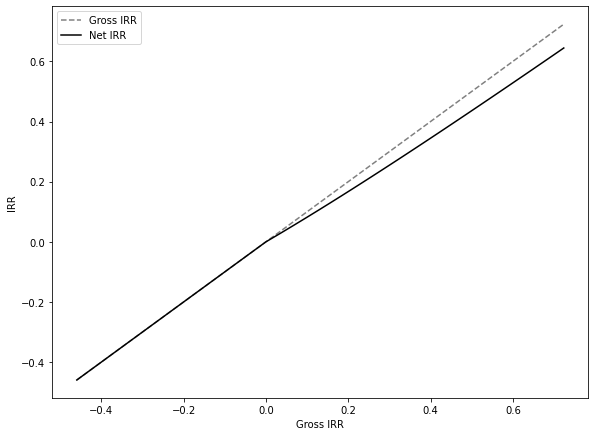

In [47]:
#Plot the pre vs. post IRR
plt.plot(IRR_pre, IRR_pre, color='grey', linestyle='--')
plt.plot(IRR_pre, IRR_post, color='black')
plt.legend(['Gross IRR', 'Net IRR'])
plt.xlabel("Gross IRR")
plt.ylabel("IRR")
plt.show()

Now to add in the code that takes care of the case where we don't have a catch up but we do have a hurdle rate.

In [48]:
def find_net_IRR(cash_flows, performance_fee, hurdle_rate=None, catch_up=False):
    #Copy over the cash flows
    cash_flows_net = cash_flows.copy()
    
    if hurdle_rate is None:
        
        #Get the total distributions only if positive for the performance fee
        gp_share = max(0, cash_flows_net.sum()) * performance_fee
        
        #Subtract out the general partner share from the cash flows
        cash_flows_net.iloc[-1] -= gp_share
    else:
        #Find the NPV given the hurdle rate
        NPV = (cash_flows / (1+hurdle_rate) ** cash_flows.index).sum()
        
        #A negative NPV means no performance fee will be taken
        if NPV < 0:
            pass
        else:
            #Find the future value of the NPV
            FV = NPV * (1+hurdle_rate) ** cash_flows_net.index[-1]
            
            #Subtract the future value from the last year
            cash_flows_net.iloc[-1] -= FV
            
            if catch_up:
                assert False, "Not implemented yet"
            else:
                cash_flows_net.iloc[-1] += FV * (1-performance_fee)
            
    
    #Compute the IRR
    IRR = minimize(sq_distance, -.2, args=(cash_flows_net.index, cash_flows_net), method="Nelder-Mead")['x'][0]
    
    return IRR

These first graph shows the different IRRs and the second graph shows the differential between the two IRRs at different gross IRRs. You'll notice how at first they are the same but then diverge.

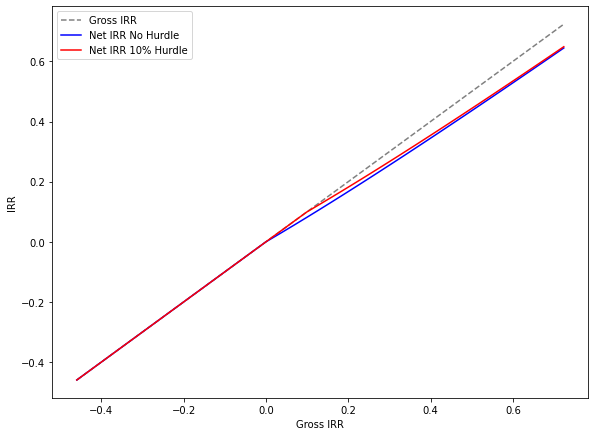

In [49]:
#Find the IRR with no hurdle rate
IRR_post1 = [find_net_IRR(cf, .2) for cf in x_cf]

#Find the IRR with a 10% hurdle rate
IRR_post2 = [find_net_IRR(cf, .2, hurdle_rate=.1) for cf in x_cf]

plt.plot(IRR_pre, IRR_pre, color='grey', linestyle='--')
plt.plot(IRR_pre, IRR_post1, color='blue')
plt.plot(IRR_pre, IRR_post2, color='red')
plt.legend(['Gross IRR', 'Net IRR No Hurdle', 'Net IRR 10% Hurdle'])
plt.xlabel("Gross IRR")
plt.ylabel("IRR")
plt.show()

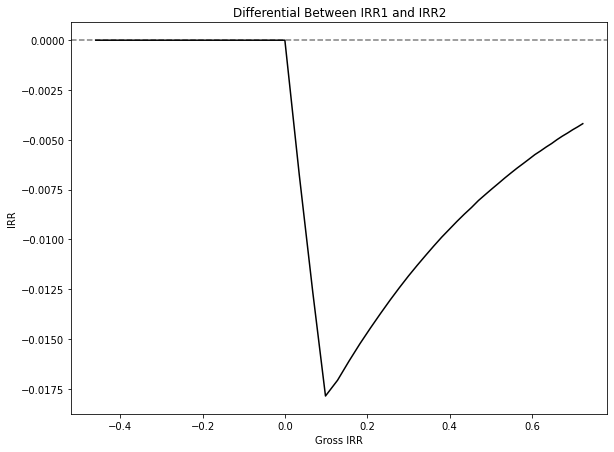

In [50]:
difference = [x-y for x,y in zip(IRR_post1, IRR_post2)]

plt.axhline(0, color='grey', linestyle="--")
plt.plot(IRR_pre, difference, color='black')
plt.title("Differential Between IRR1 and IRR2")
plt.xlabel("Gross IRR")
plt.ylabel("IRR")
plt.show()

Let's look at a few more examples!

In [51]:
def find_net_IRR(cash_flows, performance_fee, hurdle_rate=None, catch_up=False):
    #Copy over the cash flows
    cash_flows_net = cash_flows.copy()
    
    if hurdle_rate is None:
        
        #Get the total distributions only if positive for the performance fee
        gp_share = max(0, cash_flows_net.sum()) * performance_fee
        
        #Subtract out the general partner share from the cash flows
        cash_flows_net.iloc[-1] -= gp_share
    else:
        #Find the NPV given the hurdle rate
        NPV = (cash_flows / (1+hurdle_rate) ** cash_flows.index).sum()
        
        #A negative NPV means no performance fee will be taken
        if NPV < 0:
            pass
        else:
            #Find the future value of the NPV
            FV = NPV * (1+hurdle_rate) ** cash_flows_net.index[-1]
            
            #Subtract the future value from the last year
            cash_flows_net.iloc[-1] -= FV
            
            if catch_up:
                #Find the maximum of what the catch up can be
                c = (cash_flows_net.sum() * performance_fee) / (1- performance_fee)
                
                #If the FV is less than the catch up, all this profit goes to the GP
                if FV < c:
                    pass
                else:
                    #Allocate all profit after the catch up fee given the performance fee share
                    FV -= c
                    cash_flows_net.iloc[-1] += FV * (1-performance_fee)
                
            else:
                cash_flows_net.iloc[-1] += FV * (1-performance_fee)
            
    
    #Compute the IRR
    IRR = minimize(sq_distance, -.2, args=(cash_flows_net.index, cash_flows_net), method="Nelder-Mead")['x'][0]
    
    return IRR

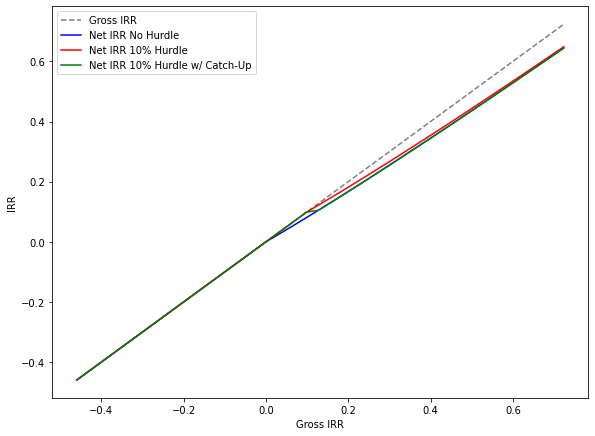

In [52]:
#Find the IRR with no hurdle rate
IRR_post1 = [find_net_IRR(cf, .2) for cf in x_cf]

#Find the IRR with a 10% hurdle rate
IRR_post2 = [find_net_IRR(cf, .2, hurdle_rate=.1) for cf in x_cf]

#Find the IRR with a 10% hurdle rate and a catch up
IRR_post3 = [find_net_IRR(cf, .2, hurdle_rate=.1, catch_up=True) for cf in x_cf]

plt.plot(IRR_pre, IRR_pre, color='grey', linestyle='--')
plt.plot(IRR_pre, IRR_post1, color='blue')
plt.plot(IRR_pre, IRR_post2, color='red')
plt.plot(IRR_pre, IRR_post3, color='green')
plt.legend(['Gross IRR', 'Net IRR No Hurdle', 'Net IRR 10% Hurdle', 'Net IRR 10% Hurdle w/ Catch-Up'])
plt.xlabel("Gross IRR")
plt.ylabel("IRR")
plt.show()

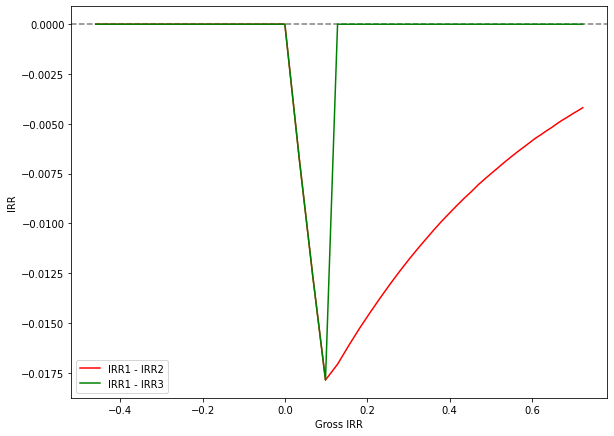

In [53]:
#Differences between IRRs
difference1 = [x-y for x,y in zip(IRR_post1, IRR_post2)]
difference2 = [x-y for x,y in zip(IRR_post1, IRR_post3)]

plt.axhline(0, color='grey', linestyle="--")
plt.plot(IRR_pre, difference1, color='red', label="IRR1 - IRR2")
plt.plot(IRR_pre, difference2, color='green', label="IRR1 - IRR3")
plt.xlabel("Gross IRR")
plt.ylabel("IRR")
plt.legend()
plt.show()

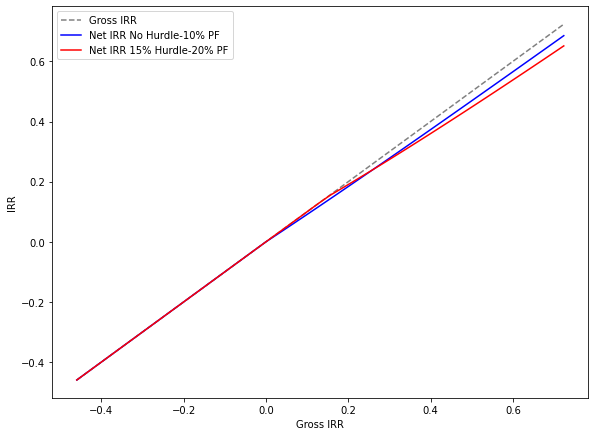

In [54]:
IRR_post1 = [find_net_IRR(cf, .1,) for cf in x_cf]
IRR_post2 = [find_net_IRR(cf, .2, hurdle_rate=.15) for cf in x_cf]

plt.plot(IRR_pre, IRR_pre, color='grey', linestyle='--')
plt.plot(IRR_pre, IRR_post1, color='blue')
plt.plot(IRR_pre, IRR_post2, color='red')
plt.legend(['Gross IRR', 'Net IRR No Hurdle-10% PF', 'Net IRR 15% Hurdle-20% PF'])
plt.xlabel("Gross IRR")
plt.ylabel("IRR")
plt.show()